# DNN
- 여러 개의 은닉층을 가짐
- 은닉층이 2개 이상인 깊은(deep) 구조

## DNN의 기본 구조
- 입력층 (Input Layer): 입력 데이터 벡터 (예: 64차원 이미지 벡터)
- 은닉층 (Hidden Layers): 여러 개의 Dense Layer (가중치와 활성화 함수 포함)
- 출력층 (Output Layer): 예측 결과 출력 (예: 숫자 분류: 0~9)

## DNN의 장점
- 비선형적이고 복잡한 패턴 학습 가능
- 다층 구조로 더 높은 표현력
- 다양한 문제(이미지, 텍스트 등)에 적용 가능

## DNN의 단점
- 많은 데이터 필요
- 계산 비용이 큼
- 과적합 가능성 존재 → Dropout, 규제 필요

Epoch 1/20


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2887 - loss: 2.0600
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8543 - loss: 0.8215
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9223 - loss: 0.3322
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9707 - loss: 0.1808
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9781 - loss: 0.1219
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9842 - loss: 0.0932
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9958 - loss: 0.0591
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9948 - loss: 0.0459
Epoch 9/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9963 - loss: 0.0380
Epoch 10/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9983 - loss: 0.0301
Epoch 11/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9995 - loss: 0.0264
Epoch 12/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9996 - loss: 0.0177


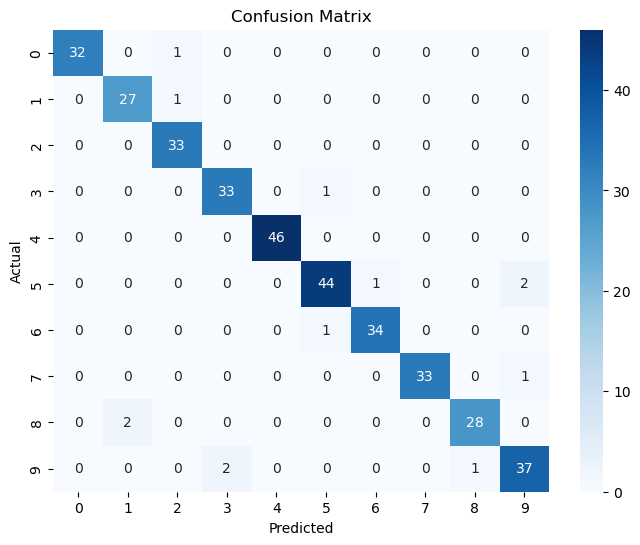

Predicted Label: 1
Actual Label: 1


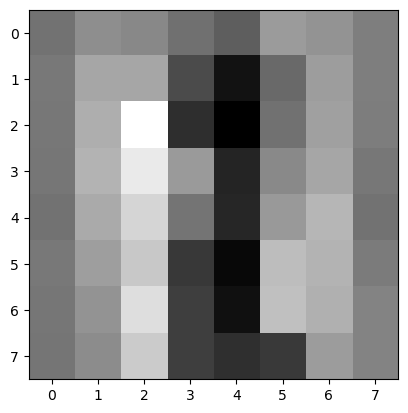

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# 데이터 불러오기
digits = datasets.load_digits()
X = digits.data  # 8x8 이미지가 64차원 벡터로 펼쳐짐
y = digits.target  # 숫자 라벨 (0~9)

# 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 원 핫 인코딩
y_categorical = to_categorical(y, num_classes=10)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

# DNN 모델 생성
model = Sequential([
    Dense(64, activation='relu', input_shape=(64,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# optimizer=adam, loss function=categorical_crossentropy, 정확도 측정
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#학습
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# 평가
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = np.argmax(y_test, axis=1)

acc = accuracy_score(y_true, y_pred)
print("Test Accuracy:", acc)

# 혼동 행렬 확인
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 테스트 이미지 확인
plt.imshow(X_test[10].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
print("Predicted Label:", y_pred[10])
print("Actual Label:", y_true[10])


## Dense Layer, DNN 용어
Dense Layer (Fully Connected Layer): 모든 입력 뉴런이 모든 출력 뉴런과 연결된 층
DNN (Deep Neural Network): 은닉층이 여러 개인 인공신경망(ANN). 다양한 종류의 층들을 포함할 수 있음